# Clustering Exploration on the Heart Failure Kaggle Dataset

This notebook runs several unsupervised leaning algorithms (clustering and dimensionality reduction) methods on the heart failure kaggle dataset to explore the data... 

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn_extra.cluster import KMedoids


/Users/omrinewman/FinalProj/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

# Assuming your dataframe is named 'df'
# Load your dataset
# For example:
# df = pd.read_csv('heart.csv')
df = pd.read_csv('../data/heart.csv')

# Select relevant columns for clustering (e.g., numerical features)
# Adjust this based on your specific dataset
columns_for_clustering = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columns_for_clustering])

# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster_labels_kmeans'] = kmeans.fit_predict(df_scaled)

# Hierarchical clustering using dendrogram
linkage_matrix = linkage(df_scaled, method='ward')  

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_scaled)

# UMAP
umap_model = UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(df_scaled)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Create a dataframe with the PCA results
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['HeartDisease'] = df['HeartDisease']

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster_labels_dbscan'] = dbscan.fit_predict(df_scaled)

# K-medoids
kmedoids = KMedoids(n_clusters=2, random_state=42)
df['cluster_labels_kmedoids'] = kmedoids.fit_predict(df_scaled)

/Users/omrinewman/FinalProj/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/omrinewman/FinalProj/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


# Kmeans pairplot

In [ ]:
df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'cluster_labels_kmeans']]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


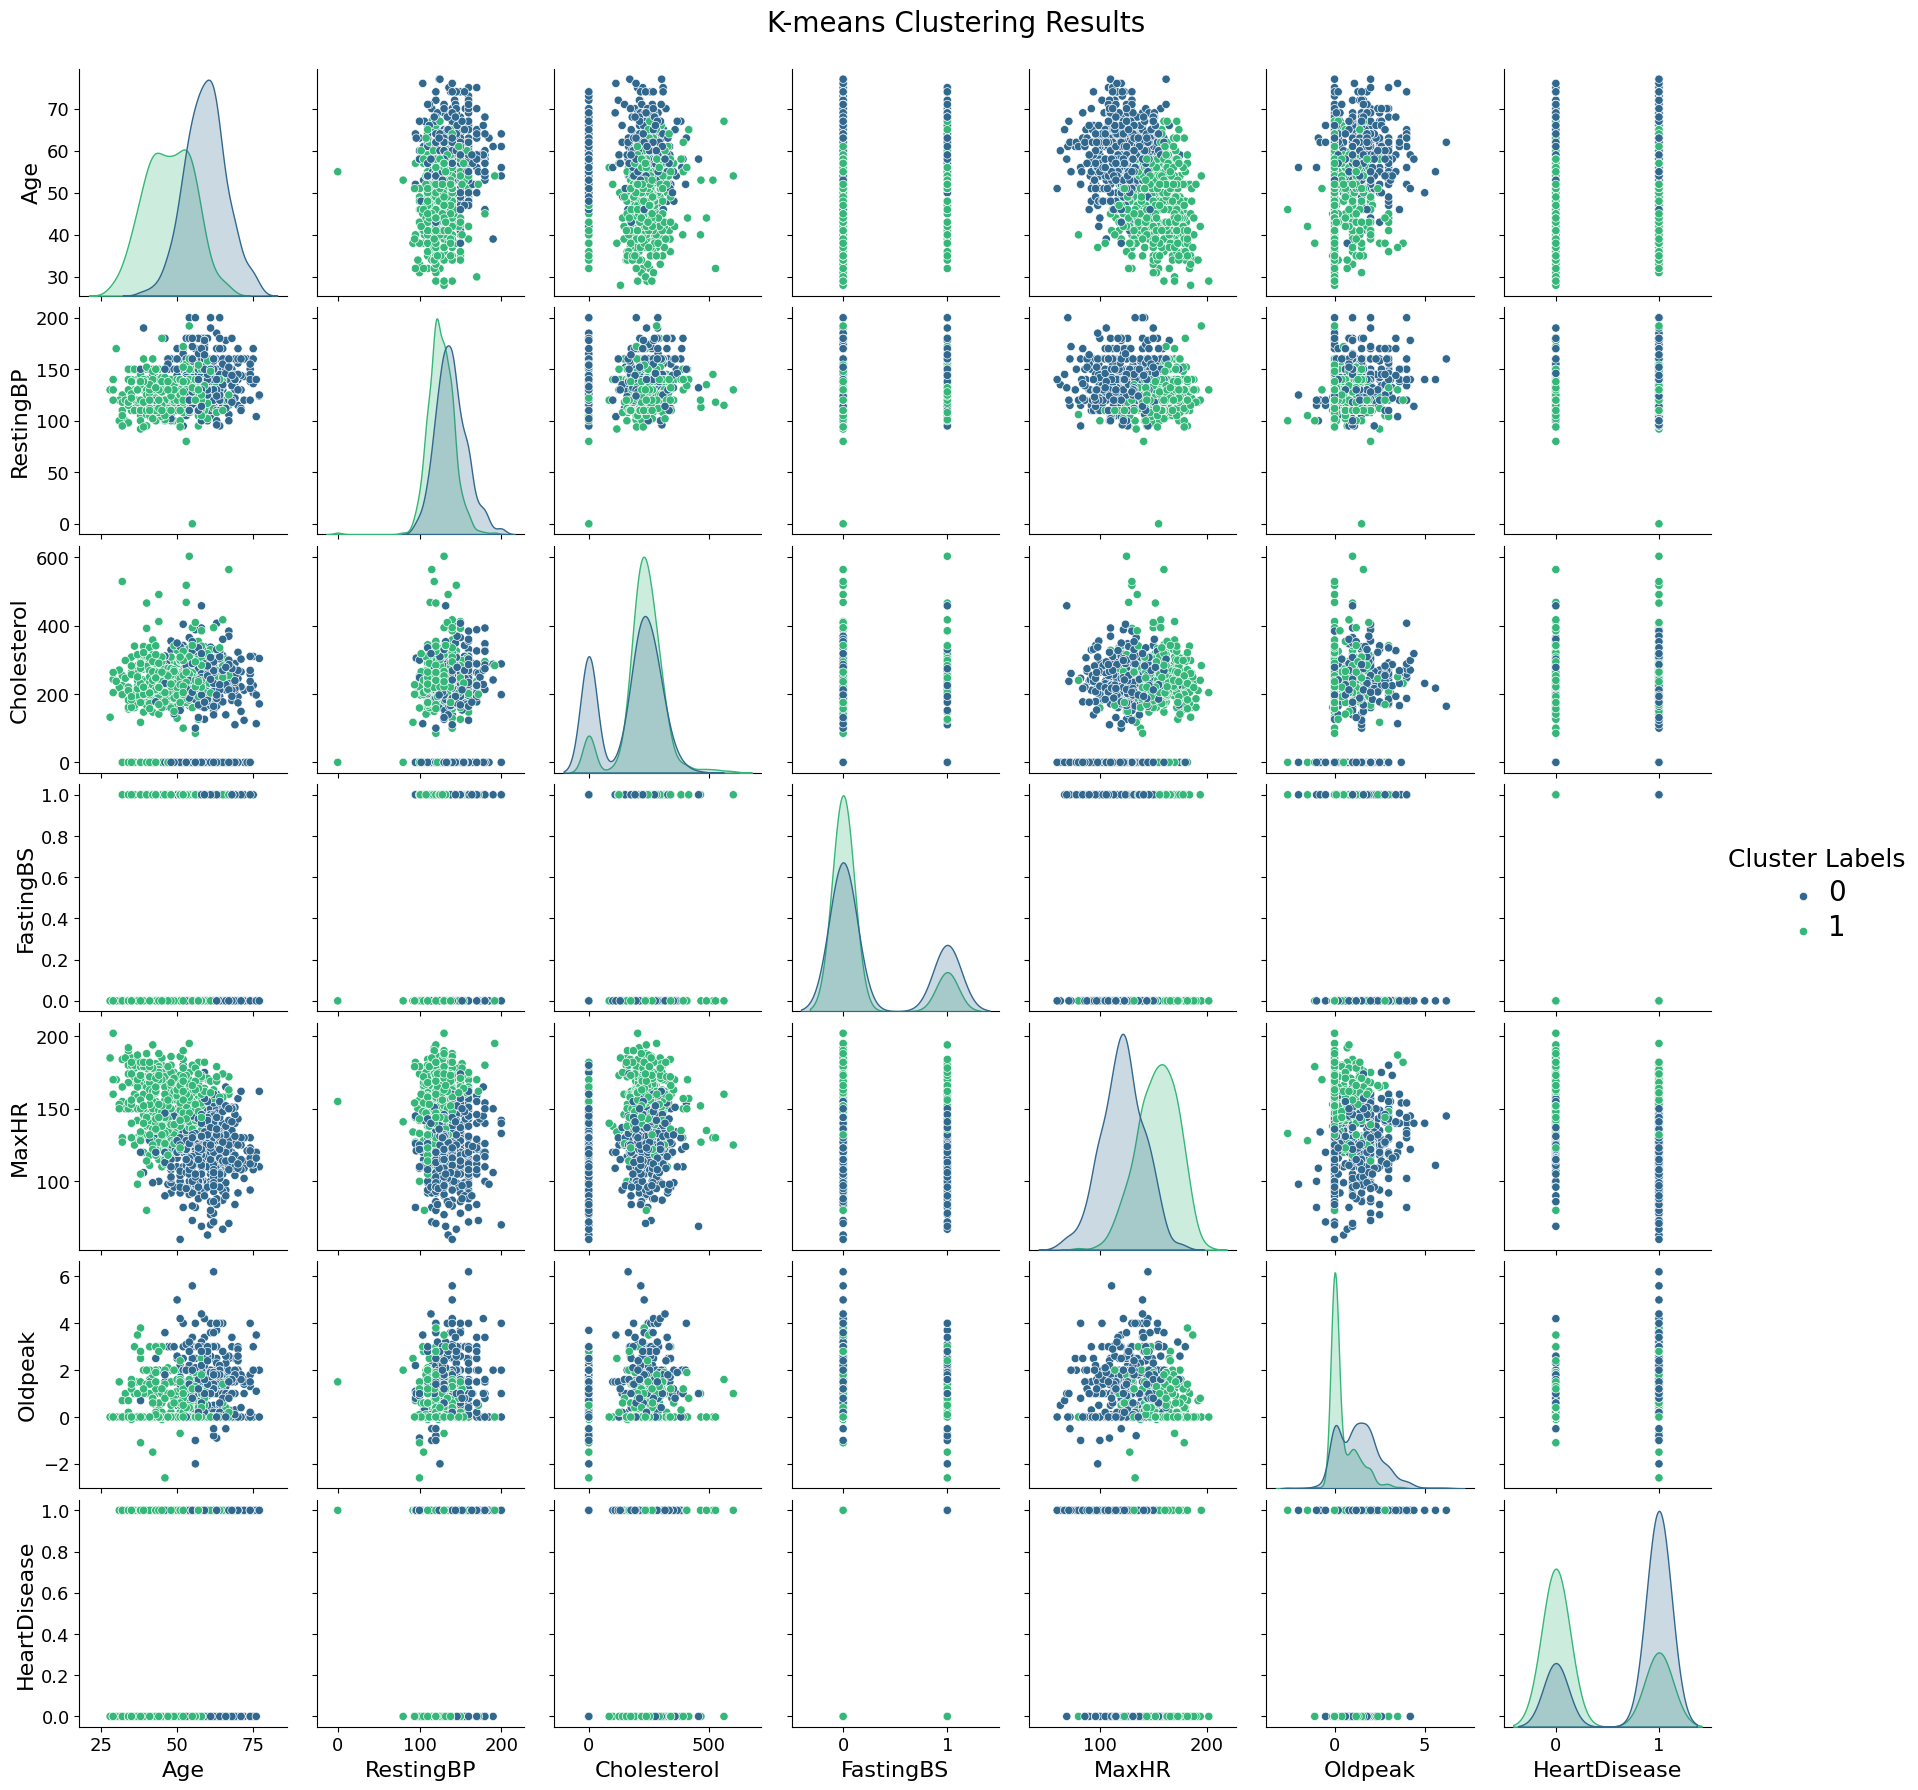

In [ ]:
dat = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'cluster_labels_kmeans']]

g = sns.pairplot(dat, hue='cluster_labels_kmeans', palette='viridis')

plt.suptitle('K-means Clustering Results', y=1.02, fontsize=20)

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=16) 
    ax.set_ylabel(ax.get_ylabel(), fontsize=16) 
    ax.tick_params(axis='both', labelsize=13)  

if g._legend:
    g._legend.set_title("Cluster Labels", prop={'size': 18})  
    for text in g._legend.texts:
        text.set_fontsize(20) 
plt.show()


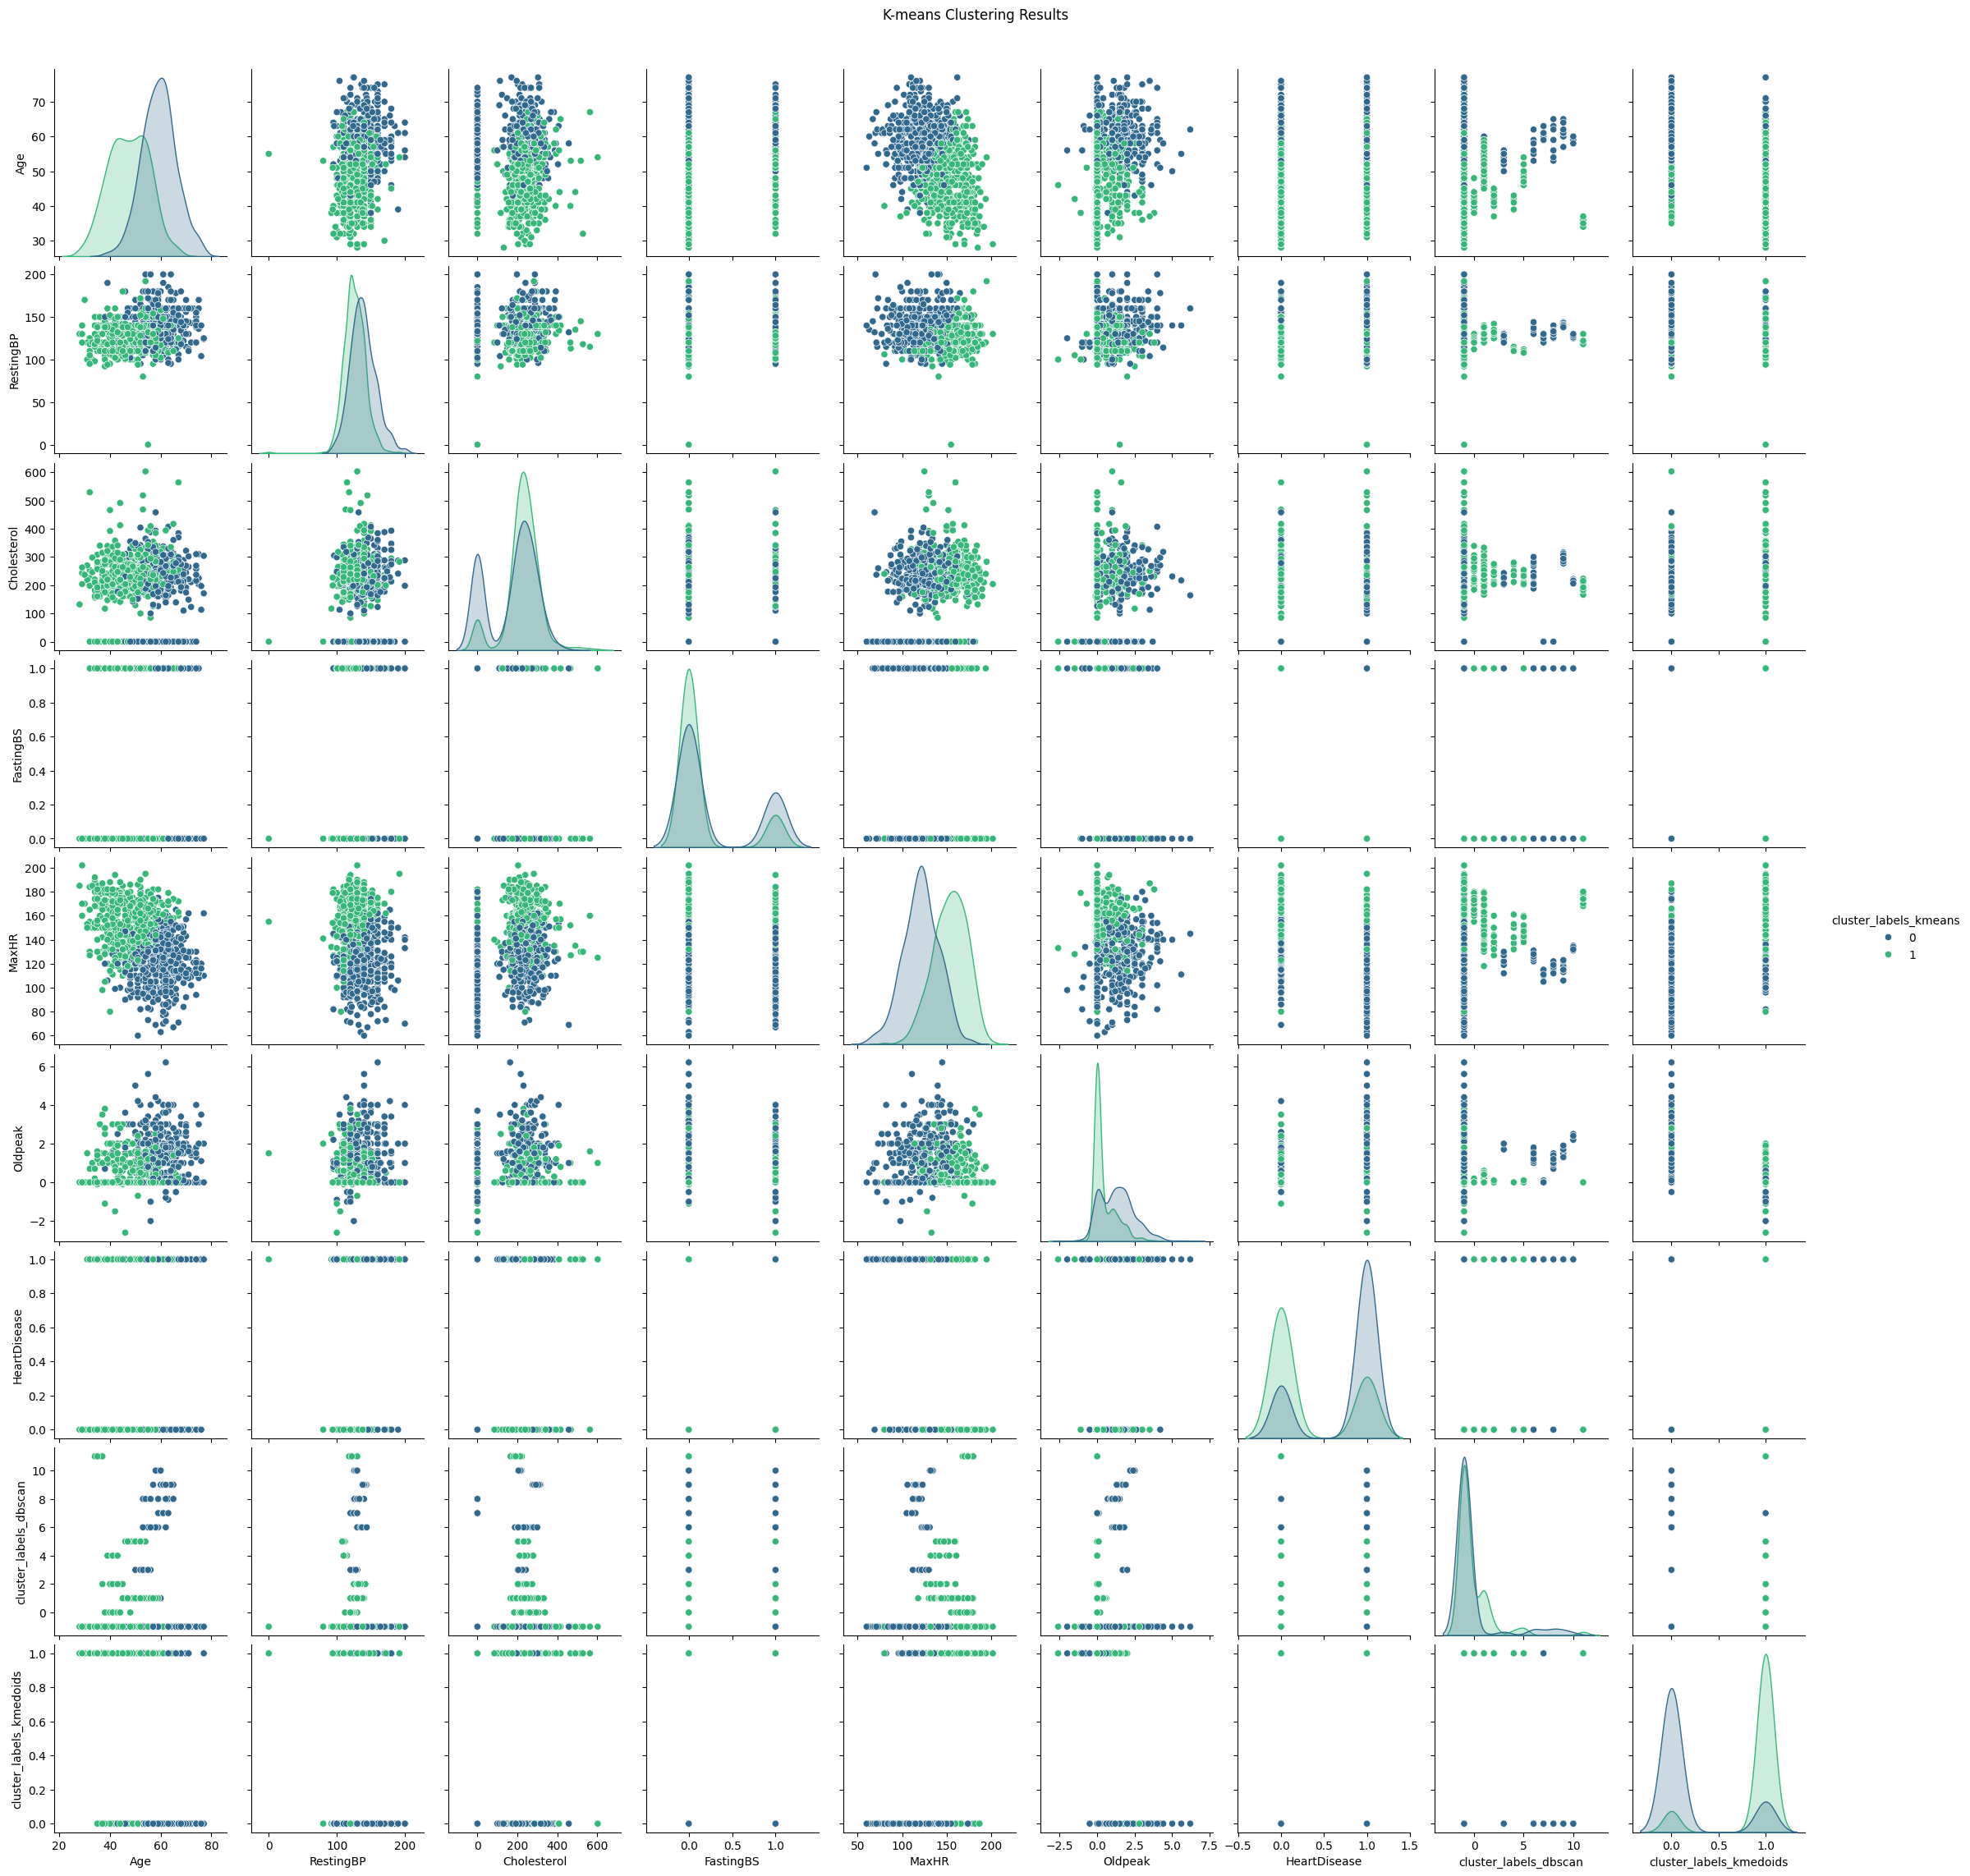

In [ ]:
# Visualize the results using pair plots
sns.pairplot(df, hue='cluster_labels_kmeans', palette='viridis')
plt.suptitle('K-means Clustering Results', y=1.02)
plt.show()

# Hierarchichal Clustering

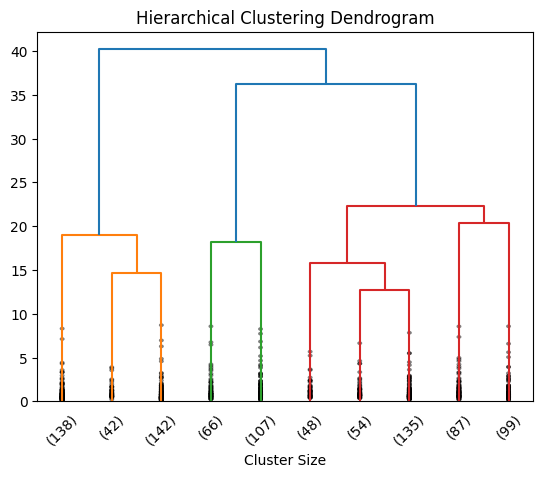

In [4]:
dendrogram(linkage_matrix, truncate_mode='lastp', p=10, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.show()

# t-SNE 

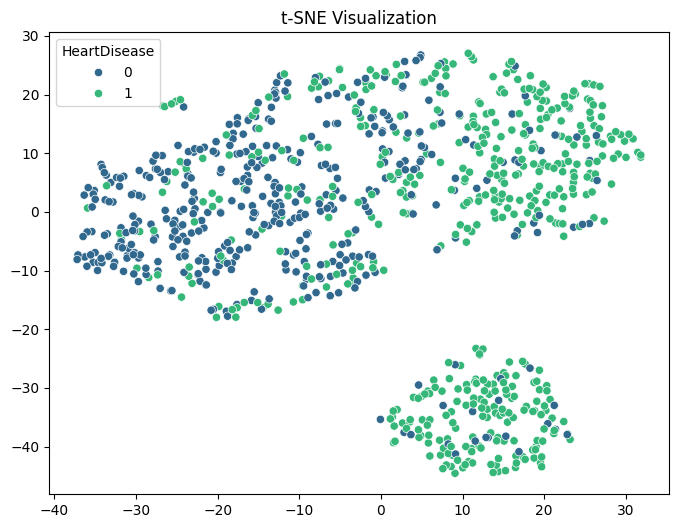

In [5]:


# Visualize t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df['HeartDisease'], palette='viridis')
plt.title('t-SNE Visualization')
plt.show()


# UMAP

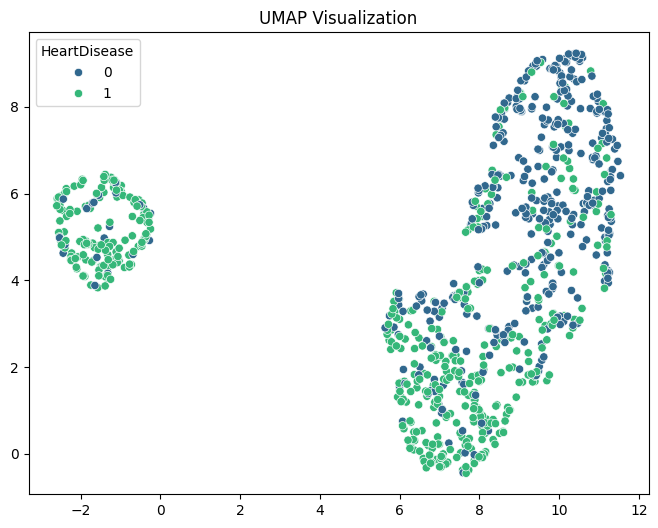

In [6]:
# Visualize UMAP results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=df['HeartDisease'], palette='viridis')
plt.title('UMAP Visualization')
plt.show()

# PCA

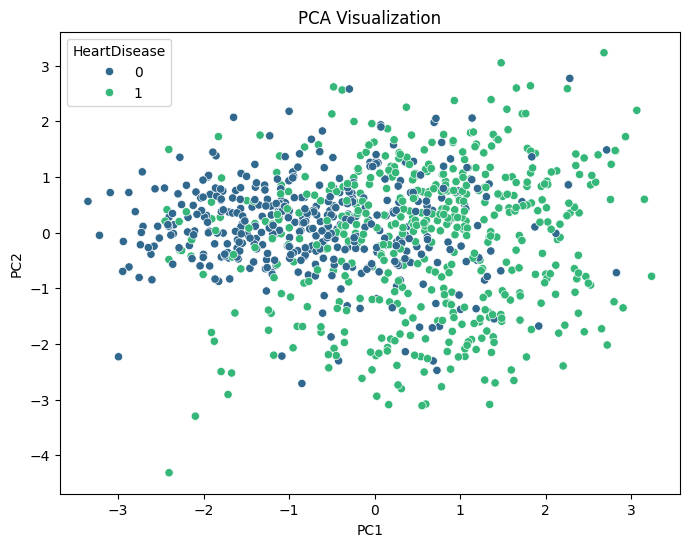

In [7]:
# Visualize PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='HeartDisease', data=df_pca, palette='viridis')
plt.title('PCA Visualization')
plt.show()

# DBSCAN

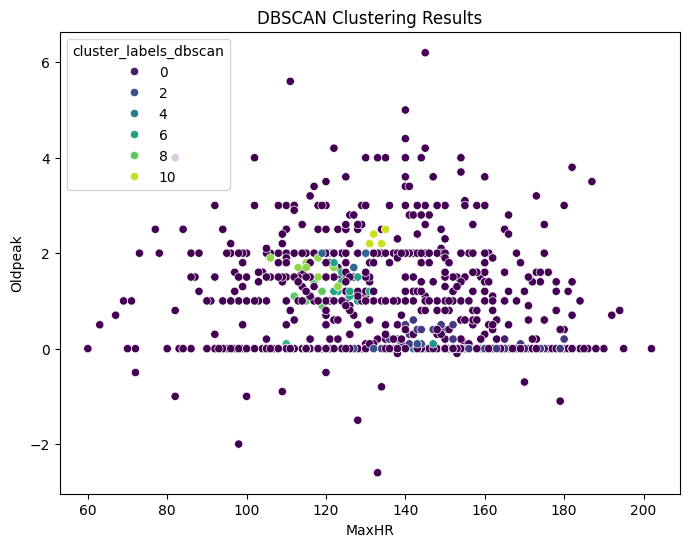

In [8]:
# Visualize DBSCAN results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MaxHR', y='Oldpeak', hue='cluster_labels_dbscan', data=df, palette='viridis')
plt.title('DBSCAN Clustering Results')
plt.show()

# K-Medoids

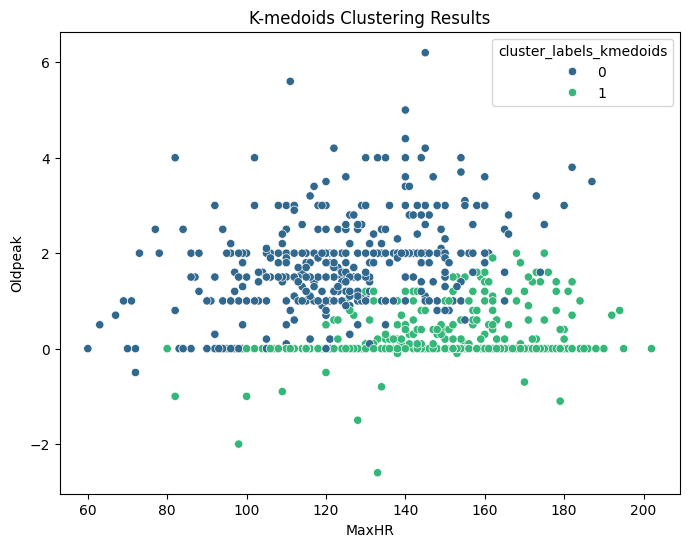

In [9]:
# Visualize K-medoids results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MaxHR', y='Oldpeak', hue='cluster_labels_kmedoids', data=df, palette='viridis')
plt.title('K-medoids Clustering Results')
plt.show()